## Acquire Data

In [1]:
from pydataset import data
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import env
from util import get_db_url
import acquire 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

1. Use a python module containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data('iris')

- Print the first 3 rows

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


- Print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

- Print the column names

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

- Print the data type of each column

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

- Print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
print("No I would not recommend rescaling the data based on the statistics, because the lengths and widths all seem to be in the same units and within a close range.")


No I would not recommend rescaling the data based on the statistics, because the lengths and widths all seem to be in the same units and within a close range.


2. Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [9]:
df_excel = pd.read_excel("Excel_Exercises.xlsx")

- Assign the first 100 rows to a new dataframe, df_excel_sample

In [10]:
df_excel_sample = df_excel.head(100)
df_excel_sample.head(10)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


- Print the number of rows of your original dataframe

In [11]:
df_excel.shape

(7049, 12)

- Print the first 5 column names

In [12]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

- Print the column names that have a data type of object

In [13]:
df_excel.dtypes[df_excel.dtypes == 'object']

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object

- Compute the range for each of the numeric variables.

In [14]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


3. Read the data from this google sheet into a dataframe, df_google

- Print the first 3 rows

In [15]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Print the number of rows and columns

In [16]:
df_googlesheet.shape

(891, 12)

- Print the column names

In [17]:
df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- Print the data type of each column

In [18]:
df_googlesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- Print the summary statistics for each of the numeric variables

In [19]:
df_googlesheet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Print the unique values for each of your categorical variables

In [20]:
print('sex', df_googlesheet.Sex.unique())
print('survived', df_googlesheet.Survived.unique())
print('pclass', df_googlesheet.Pclass.unique())

sex ['male' 'female']
survived [0 1]
pclass [3 1 2]


## Prepare Data

#### 1. Iris Data

- Use the function defined in acquire.py to load the iris data.

In [21]:
df_iris = acquire.get_iris_data()
df_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


- Drop the species_id and measurement_id columns.

In [22]:
df_iris = df_iris.drop(columns=['species_id'])
df_iris = df_iris.drop(columns=['measurement_id'])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Rename the species_name column to just species.

In [23]:
df_iris = df_iris.rename(columns={'species_name':'species'})
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?

In [24]:
encoder = LabelEncoder()
df_iris.species = encoder.fit_transform(df_iris.species)
df_iris.species.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [25]:
def prep_iris():
    df_iris = df_iris.drop(columns=['species_id'])
    df_iris = df_iris.drop(columns=['measurement_id'])
    df_iris = df_iris.rename(columns={'species_name':'species'})
    encoder = LabelEncoder()
    df_iris.species = encoder.fit_transform(df_iris.species)
    return df_iris

#### 2. Titanic Data

- Use the function you defined in acquire.py to load the titanic data set.

In [26]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


- Handle the missing values in the embark_town and embarked columns.

In [28]:
df.embark_town.fillna(np.nan, inplace=True)
df.embark_town.value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [29]:
df.embarked.fillna('Unknown', inplace=True)
df.embarked.value_counts(dropna=False)

S          644
C          168
Q           77
Unknown      2
Name: embarked, dtype: int64

- Remove the deck column.

In [30]:
df.drop(columns=['deck'], inplace=True)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1


- Use a label encoder to transform the embarked column.

In [39]:
encoder = LabelEncoder()
df.embarked = encoder.fit_transform(df.embarked)
df.embarked.head()

0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int64

**(Split my data frame into a train and a test before moving forward and scaling and performing any other functions on it.)**
    - Stratify 'survived' so that our target, survived, is represented equally in train and test.

In [43]:
train, test = train_test_split(df, train_size=.7, random_state=123, stratify=df.survived)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
199,199,0,2,female,0.296306,0,0,0.025374,2,Second,Southampton,1
468,468,0,3,male,NaN,0,0,0.015078,1,Third,Queenstown,1
198,198,1,3,female,NaN,0,0,0.015127,1,Third,Queenstown,1
574,574,0,3,male,0.195778,0,0,0.015713,2,Third,Southampton,1
776,776,0,3,male,NaN,0,0,0.015127,1,Third,Queenstown,1


In [46]:
# pre-split scaled...
# scaler = MinMaxScaler()
# df.age = scaler.fit_transform(df[['age']])
# df.age.head()

- Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

- MinMax Beneficial:
- MinMax Not Beneficial: 

In [48]:
scaler = MinMaxScaler()
scaler.fit(train[['age']])
train.age = scaler.transform(train[['age']])
train.age.head()

199    0.334089
468         NaN
198         NaN
574    0.220742
776         NaN
Name: age, dtype: float64

In [45]:
scaler = MinMaxScaler()
scaler.fit(train[['fare']])
train.fare = scaler.transform(train[['fare']])
train.fare.head()

199    0.025374
468    0.015078
198    0.015127
574    0.015713
776    0.015127
Name: fare, dtype: float64

- Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [42]:
def prep_titanic():
    df = acquire.get_titanic_data()
    df.embark_town.fillna('Other', inplace=True)
    df.embarked.fillna('Unknown', inplace=True)
    df.drop(columns=['deck'], inplace=True)
    
    encoder = LabelEncoder()
    df.embarked = encoder.fit_transform(df.embarked)
    
    scaler = MinMaxScaler()
    df.age = scaler.fit_transform(df[['age']])
    
    scaler = MinMaxScaler()
    df.fare = scaler.fit_transform(df[['fare']])
    
    return df

#### Class Exercies: 
Create a list and then graph, object and numerical values

In [36]:
# df.select_dtypes('object').columns.to_list()
# for i in columns:
#     if df[i].nunique() < 5:
#         sns.barplot(i, 'survived', data=df)
#         plt.show()

In [37]:
# df.select_dtypes(['int','float']).columns.to_list()
# target = 'survived'
# for i in columns:
#     if i != target:
#         if df[i].nunique() < 5:
#             sns.boxplot(i, target, data=df)
#             plt.show()

### Exploratory Analysis

1. Split data into train (70%) & test (30%) samples.

In [52]:
df = sns.load_dataset('iris')
train, test = train_test_split(df, train_size=.7, random_state=123)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
136,6.3,3.4,5.6,2.4,virginica
53,5.5,2.3,4.0,1.3,versicolor
19,5.1,3.8,1.5,0.3,setosa
38,4.4,3.0,1.3,0.2,setosa


2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

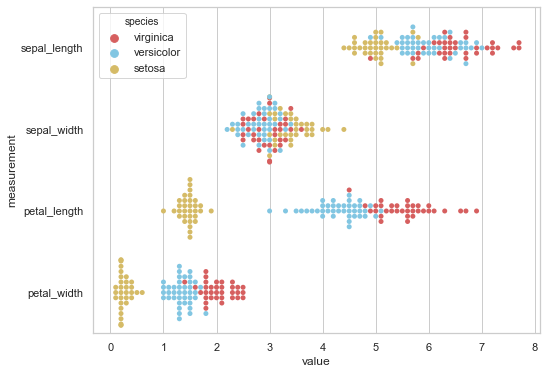

In [55]:
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']], "species", var_name="measurement")

plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="value", y="measurement", hue="species",
              palette=["r", "c", "y"], data=df_melt)
###p.set(yscale="log")

plt.show()

3. Create 4 subplots (2 rows x 2 columns) of scatterplots

    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length

Make your figure size 14 x 8. What are your takeaways?

In [59]:
train['sepal_area'] = train['sepal_length'] * train['sepal_width']
train['petal_area'] = train['petal_length'] * train['petal_width']
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
114,5.8,2.8,5.1,2.4,virginica,16.24,12.24
136,6.3,3.4,5.6,2.4,virginica,21.42,13.44
53,5.5,2.3,4.0,1.3,versicolor,12.65,5.20
19,5.1,3.8,1.5,0.3,setosa,19.38,0.45
38,4.4,3.0,1.3,0.2,setosa,13.20,0.26


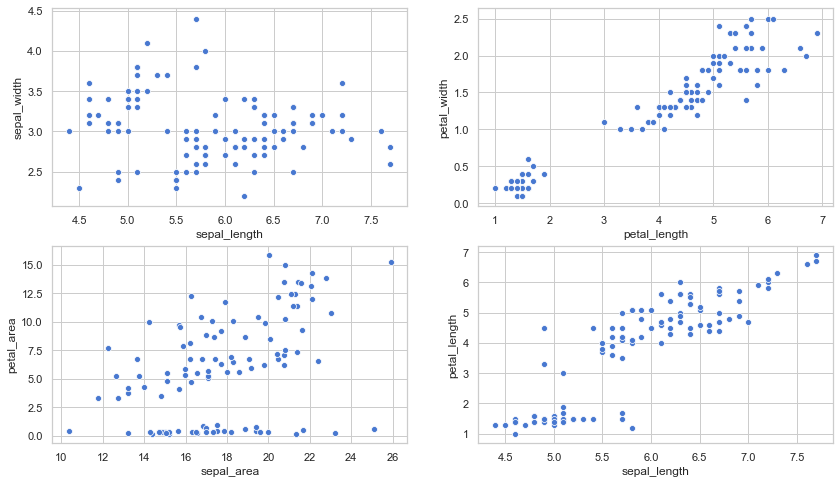

In [61]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train)
plt.subplot(2,2,2)
sns.scatterplot(x="petal_length", y="petal_width", data=train)
plt.subplot(2,2,3)
sns.scatterplot(x="sepal_area", y="petal_area", data=train)
plt.subplot(2,2,4)
sns.scatterplot(x="sepal_length", y="petal_length", data=train)

4. Create a heatmap of each variable layering correlation coefficient on top.

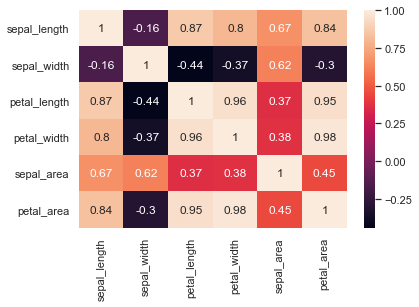

In [63]:
sns.heatmap(train.corr(), annot=True)

5. Create a scatter matrix visualizing the interaction of each variable

In [65]:
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

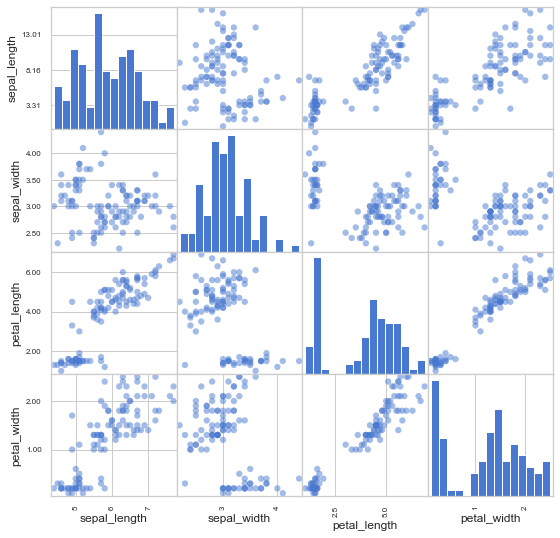

In [66]:
cmap = cm.get_cmap('gnuplot')
axes = pd.plotting.scatter_matrix(
    train[["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

6. Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

    - must include null hypothesis, alternative hypothesis, t-test, results, summary
        - H0: the difference in sepal length between virginica and versicolor is insignificant.
        - Ha: the difference in sepal length between virginica and versicolor is substantial.
    - We will test if the sepal length of virginica is significantly different than that of the versicolor.
    - If there is difference, then variable sepal_length is a good choice to keep as a feature.
    - We can use a t-test here, as sepal_length is somewhat normally distributed.

In [73]:
sp.stats.ttest_ind(
    train[train['species'] == 'virginica'].sepal_length,
    train[train['species'] == 'versicolor'].sepal_length)

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

Since the p-value is very low, I reject the null hypothesis. The sepal length between virginica and veriscolor is substantial. 